# Prophet

## Preamble

In [23]:
import pandas
import seaborn
import matplotlib
import forecast_lab

In [24]:
seaborn.set_style("ticks")
matplotlib.pyplot.rcParams["axes.grid"] = True
matplotlib.pyplot.rcParams["figure.figsize"] = (20, 3)

## Example: Forecasting Taxi Trips

In [25]:
import fbprophet

In [26]:
taxi_trips = forecast_lab.datasets.read_chicago_taxi_trips_daily()

In [27]:
taxi_trips.head()

,Trips
Date,
2013-01-01,96
2013-01-02,53
2013-01-03,61
2013-01-04,79
2013-01-05,76


Prophet expects the input time series in the format of a `pandas.DataFrame` with columns `ds` for time and `y` for values.

In [28]:
taxi_trips_p  = pandas.DataFrame(taxi_trips).reset_index()
taxi_trips_p.columns = ["ds", "y"]
## Evaluation

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

======== iteration 0 ==========
======== iteration 1 ==========
======== iteration 2 ==========
======== iteration 3 ==========
======== iteration 4 ==========
======== iteration 5 ==========
======== iteration 6 ==========
======== iteration 7 ==========
======== iteration 8 ==========
======== iteration 9 ==========
======== iteration 10 ==========
======== iteration 11 ==========
======== iteration 12 ==========
======== iteration 13 ==========
======== iteration 14 ==========
======== iteration 15 ==========
======== iteration 16 ==========
======== iteration 17 ==========
======== iteration 18 ==========
======== iteration 19 ==========


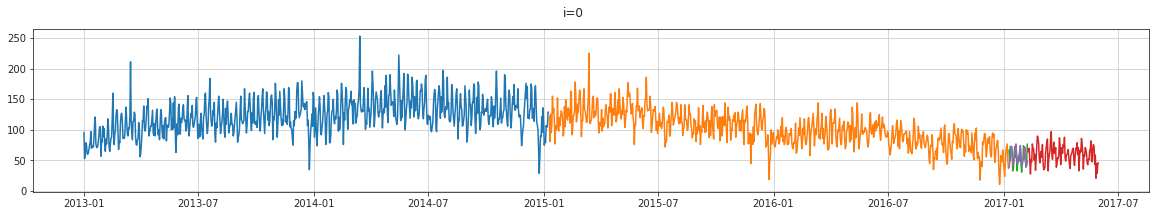

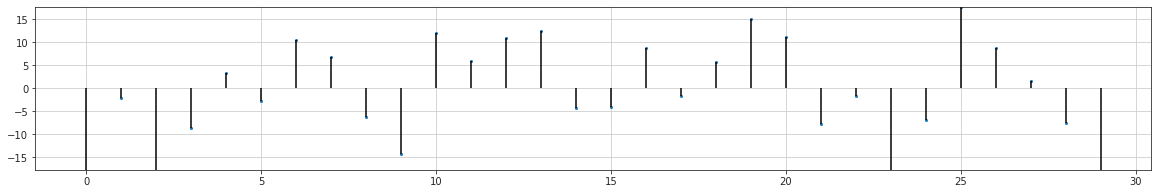

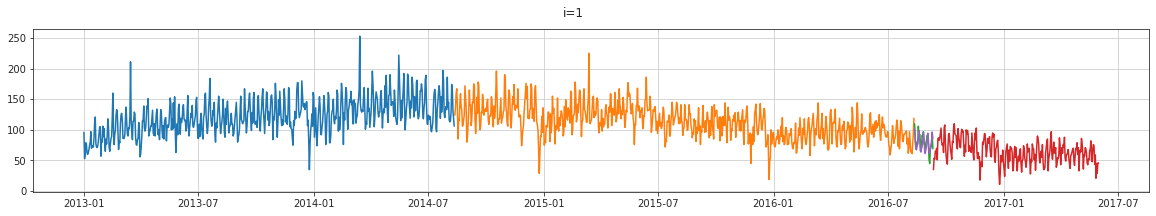

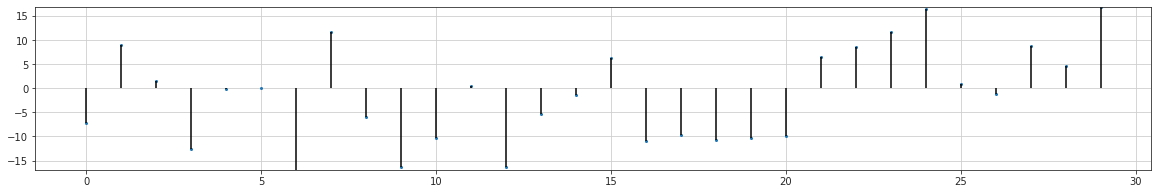

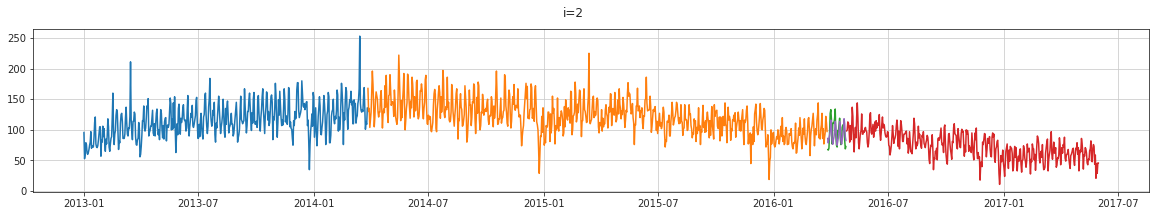

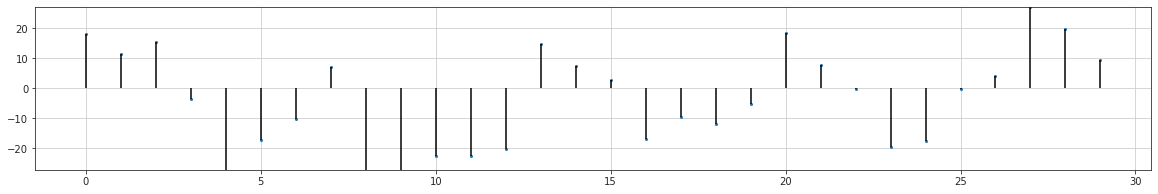

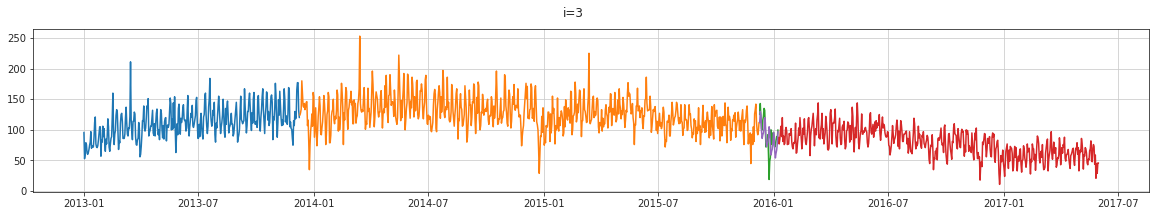

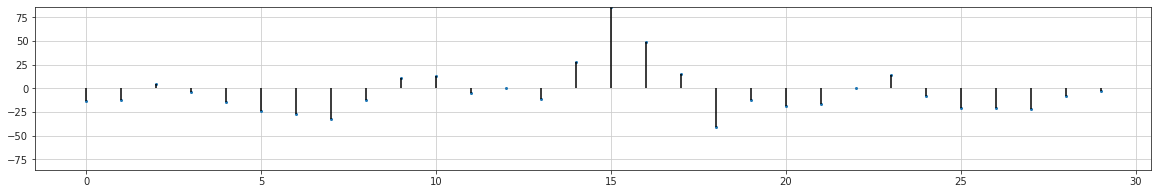

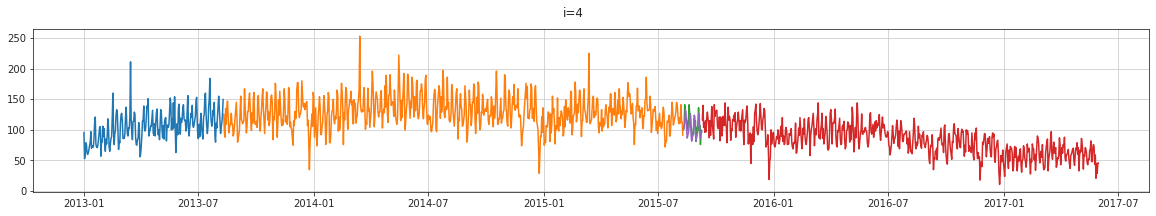

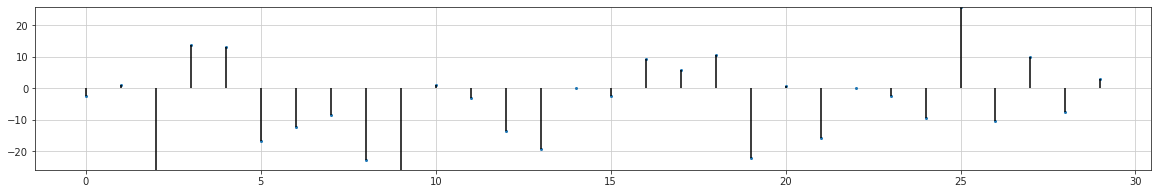

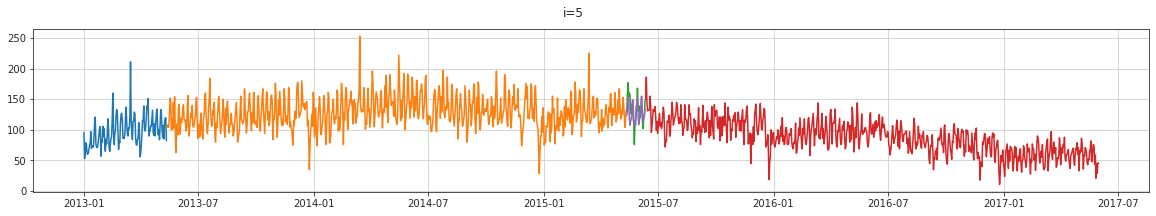

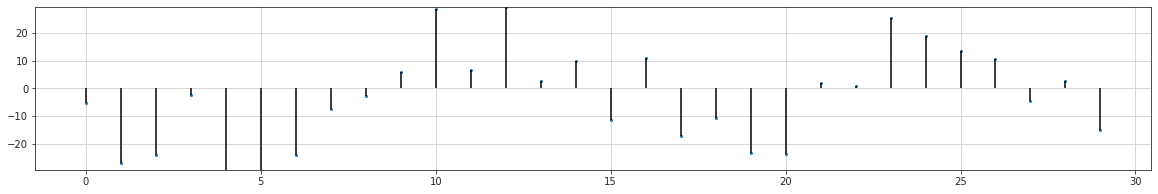

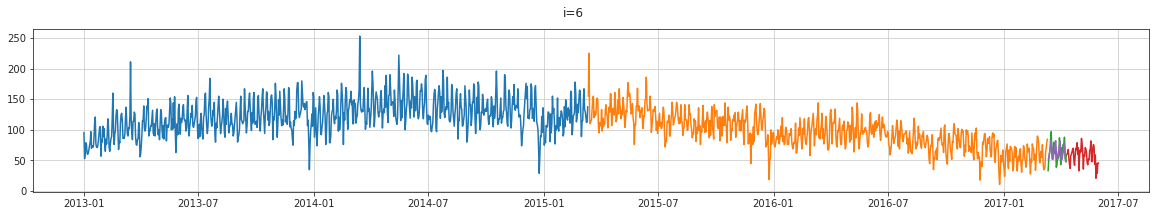

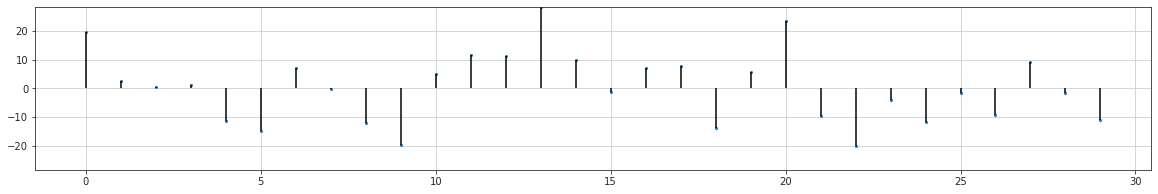

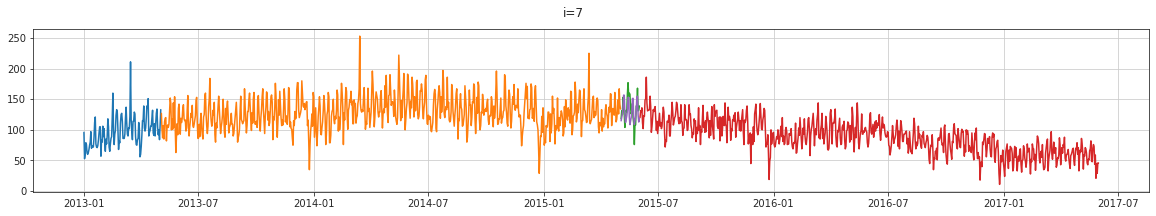

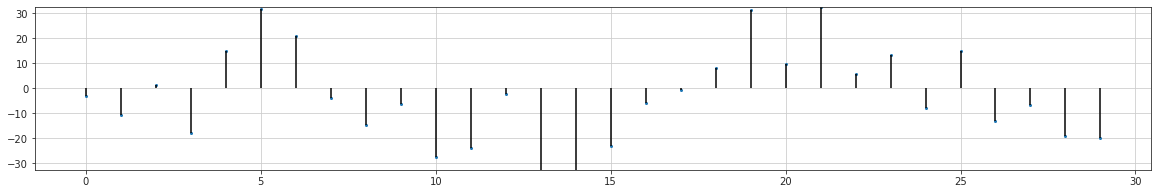

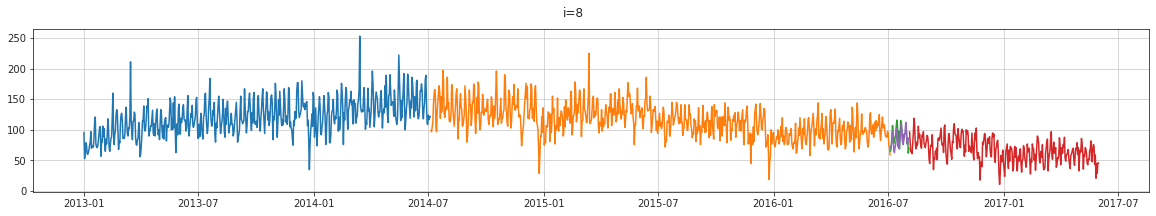

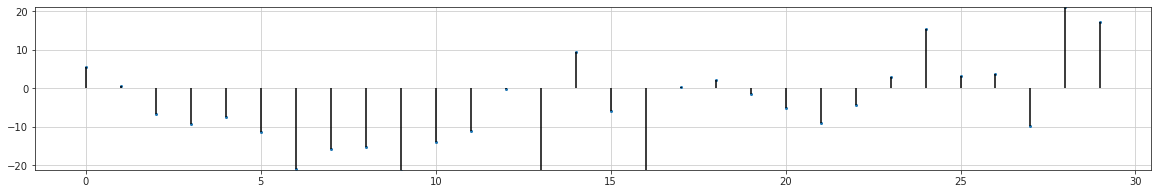

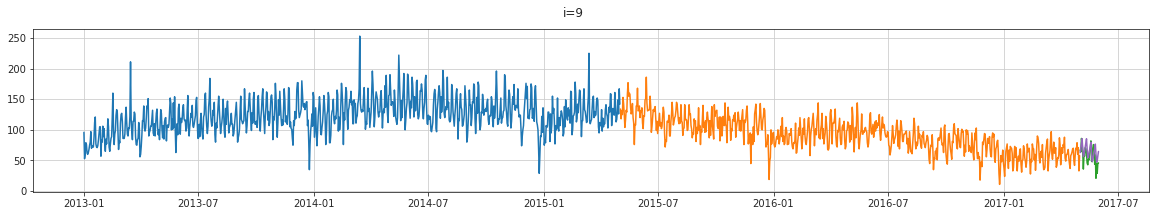

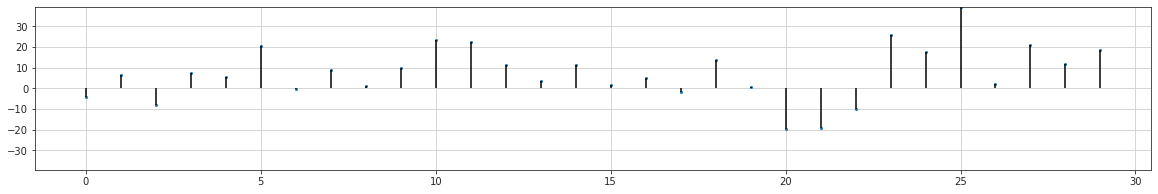

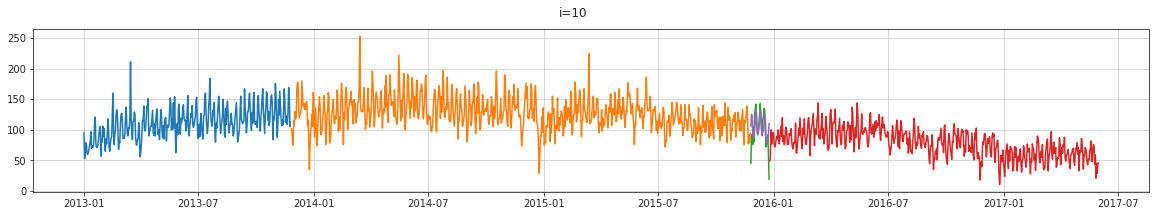

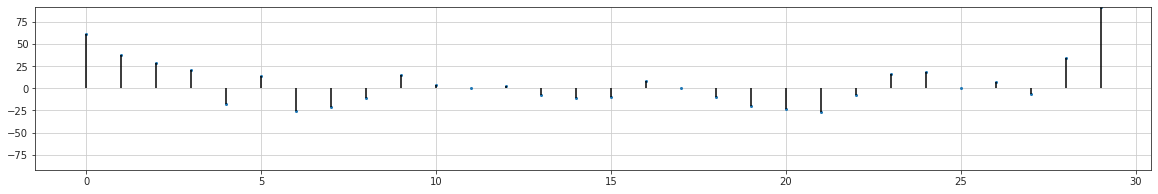

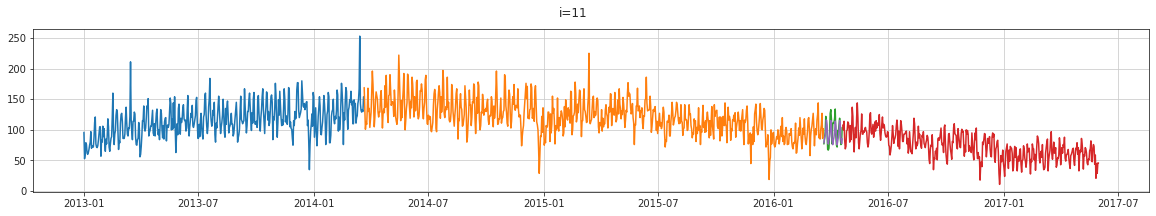

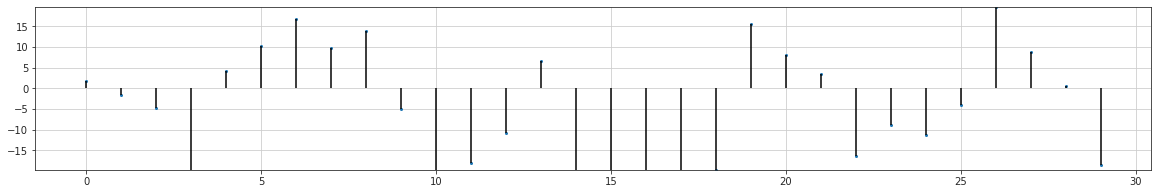

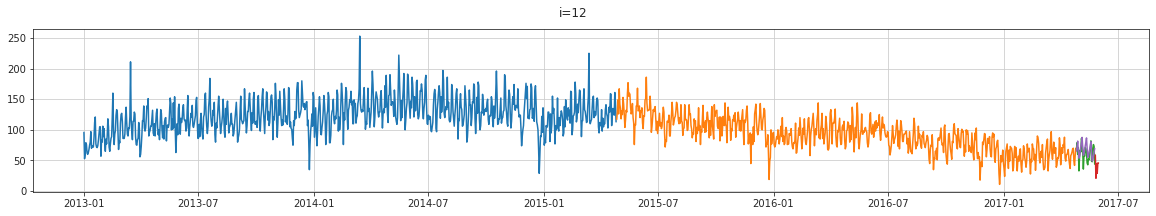

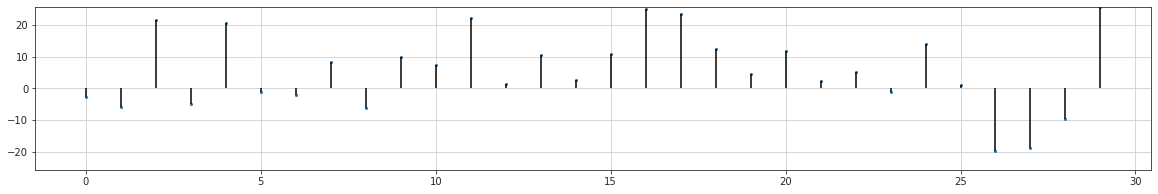

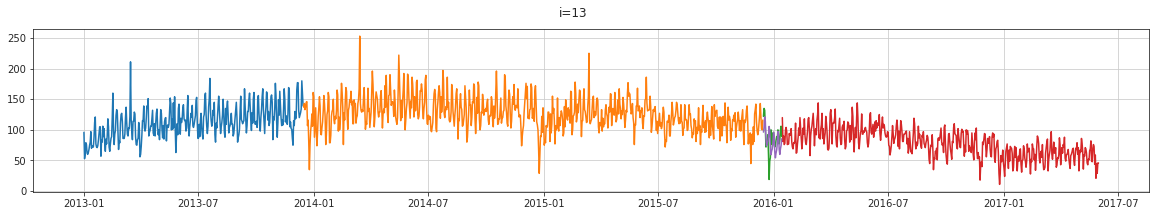

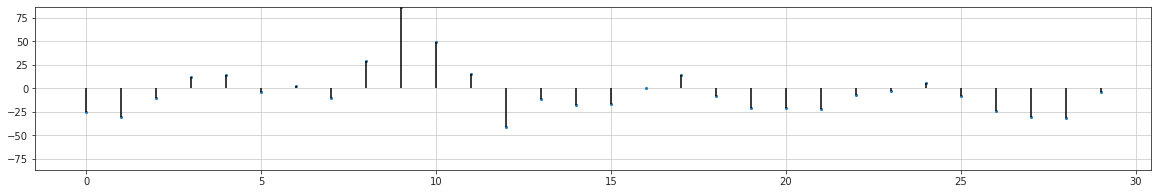

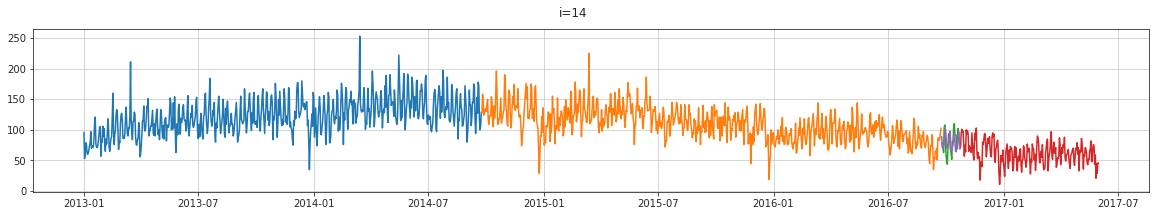

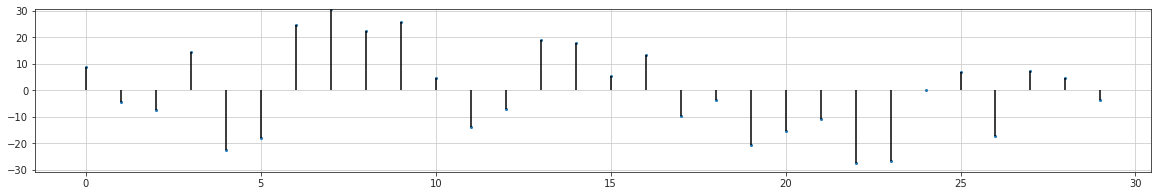

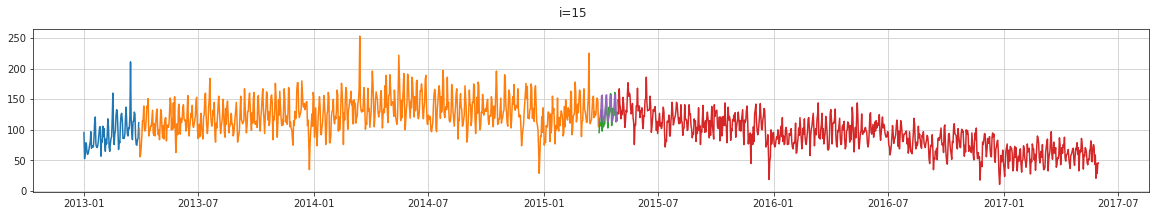

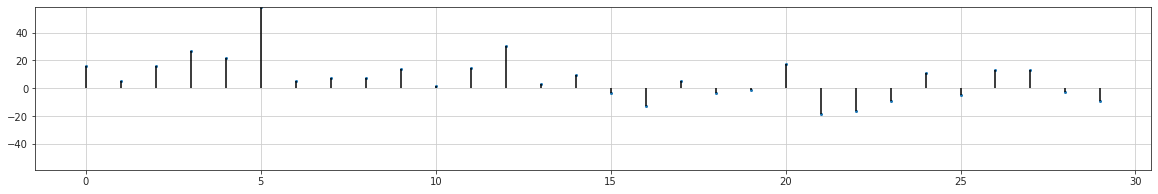

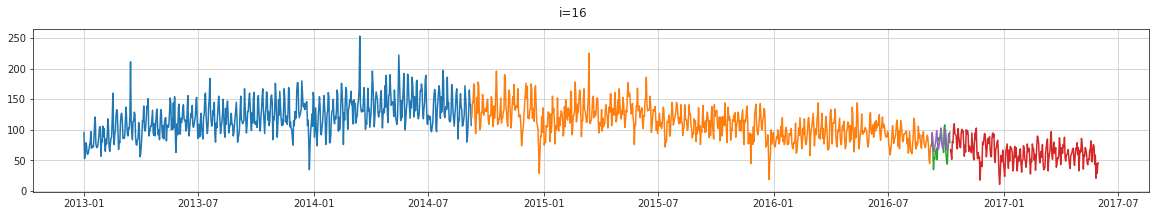

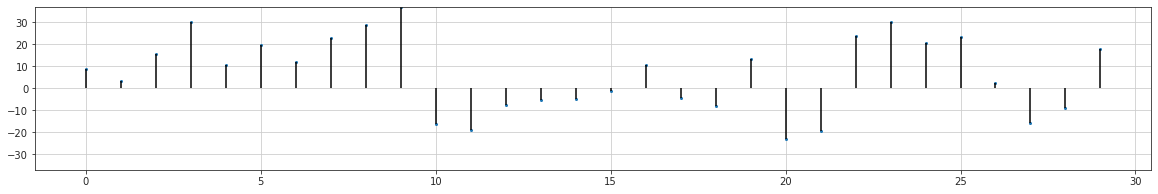

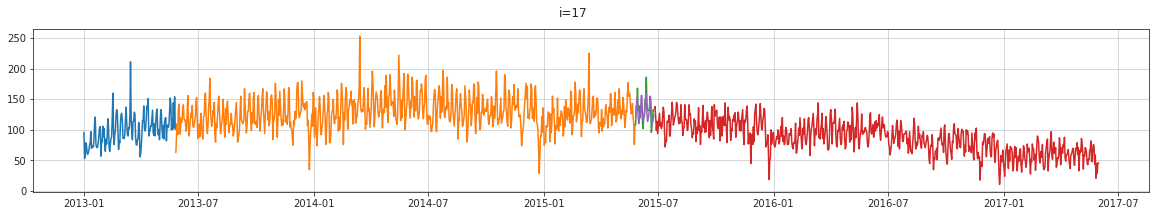

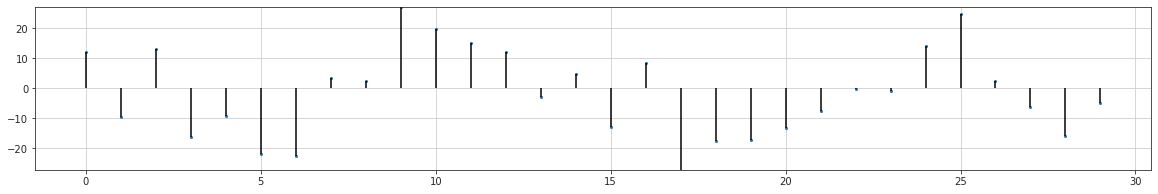

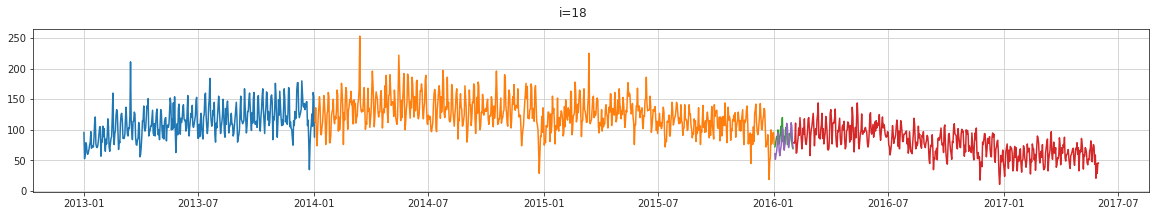

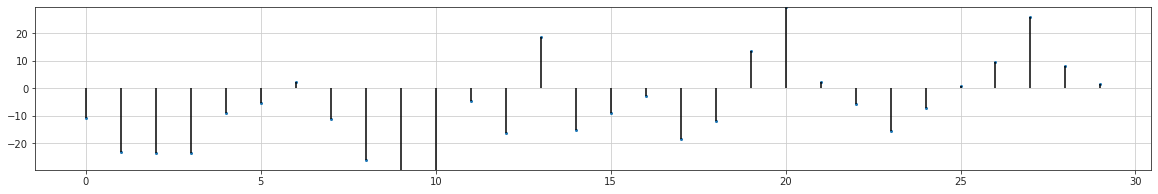

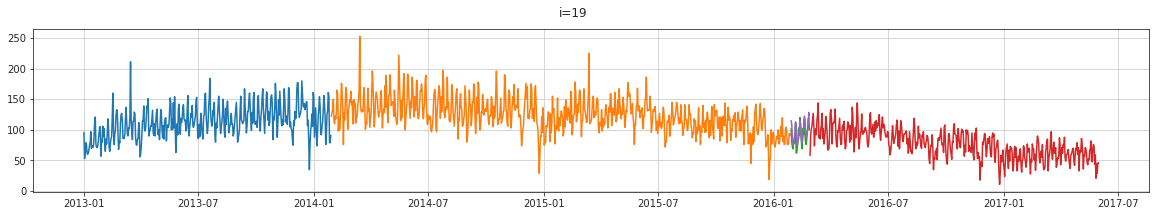

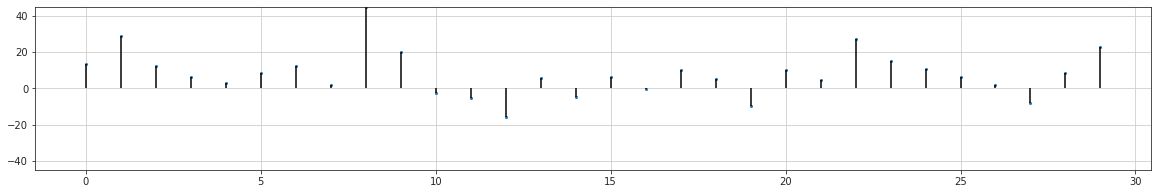

MAPE    18.086323
dtype: float64

In [35]:
forecast_lab.ForecastEvaluation(
        ts=taxi_trips["Trips"],
        forecasting=forecast_lab.ProphetWrapper(
            freq="d", 
            estimator_params={
                "holidays_prior_scale": 0.25, 
                "mcmc_samples": 0, 
                "yearly_seasonality": 10, 
                "weekly_seasonality": True}),
        test_window_size=30,
        train_window_size=730,
        metrics={
            "MAPE": forecast_lab.metrics.mean_absolute_percentage_error
        }
).evaluate(
    k=20,
    plot_segments=True,
    plot_residuals=True,
).get_metrics().mean()

## References
